C:\Users\miria\AppData\Local\Temp\ipykernel_3744\2009107801.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)
C:\Users\miria\AppData\Local\Temp\ipykernel_3744\2009107801.py:160: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)


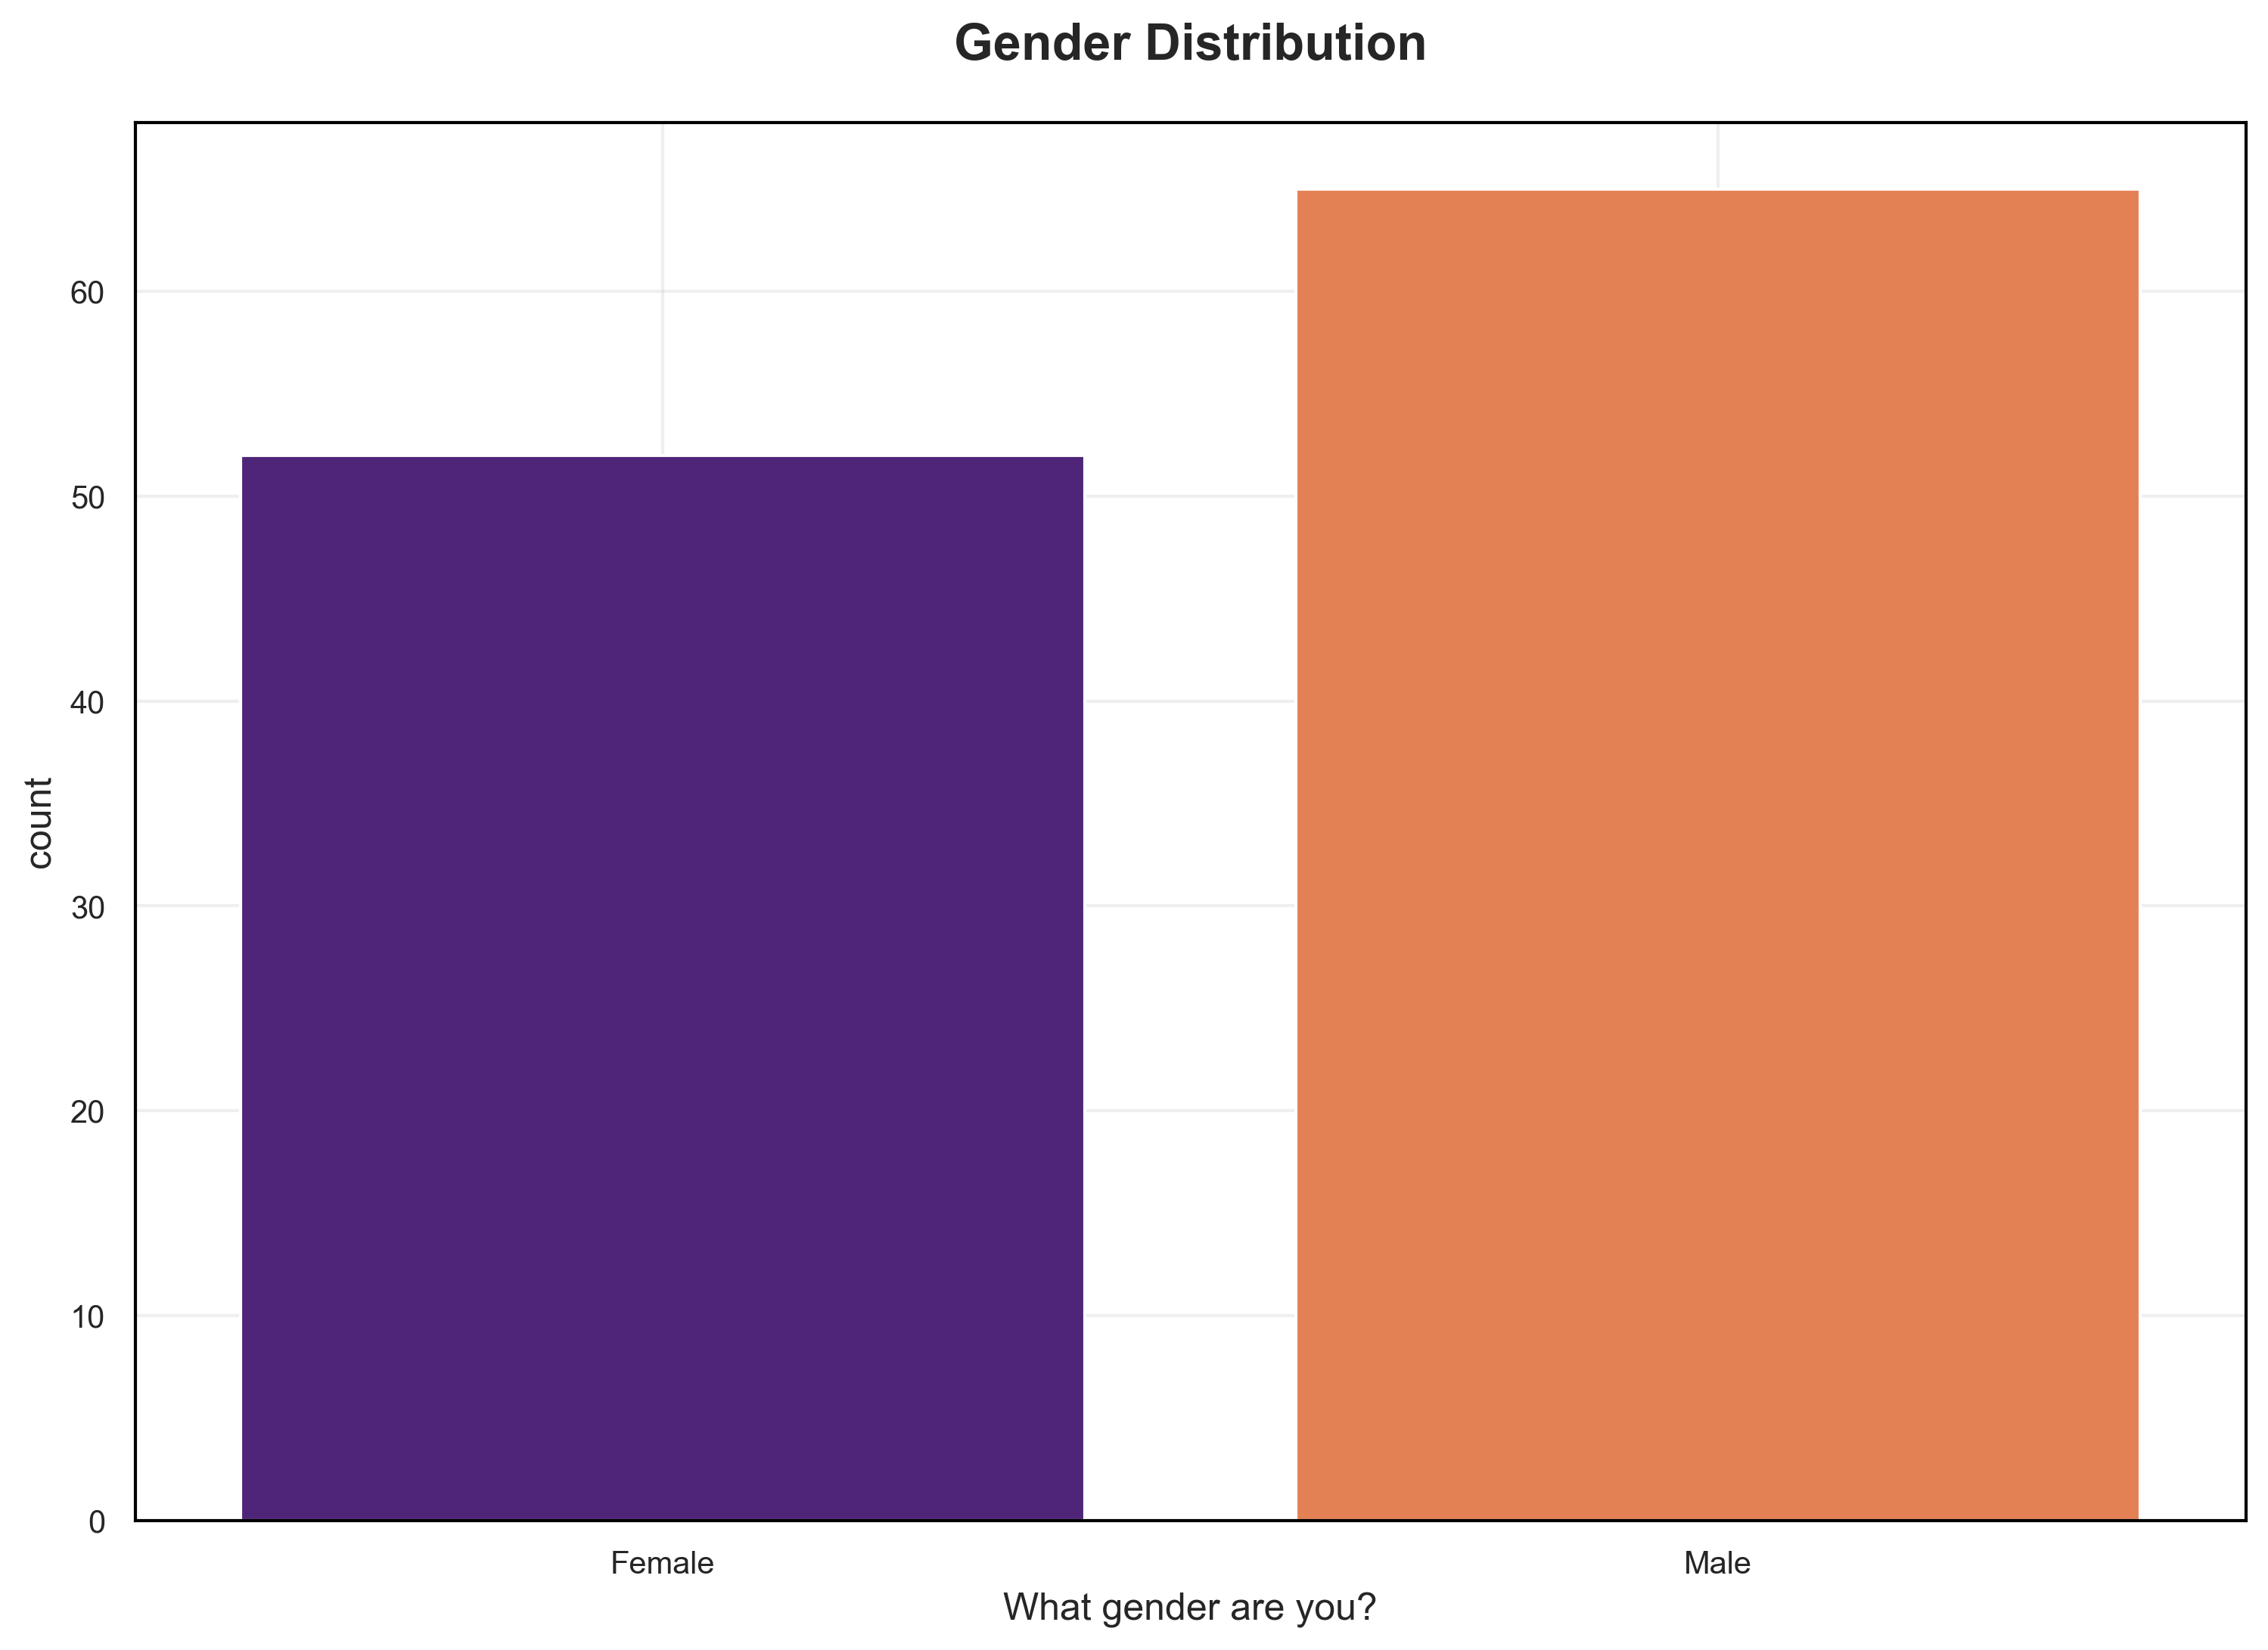

C:\Users\miria\AppData\Local\Temp\ipykernel_3744\2009107801.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)
C:\Users\miria\AppData\Local\Temp\ipykernel_3744\2009107801.py:160: UserWarning: 
The palette list has fewer values (8) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)


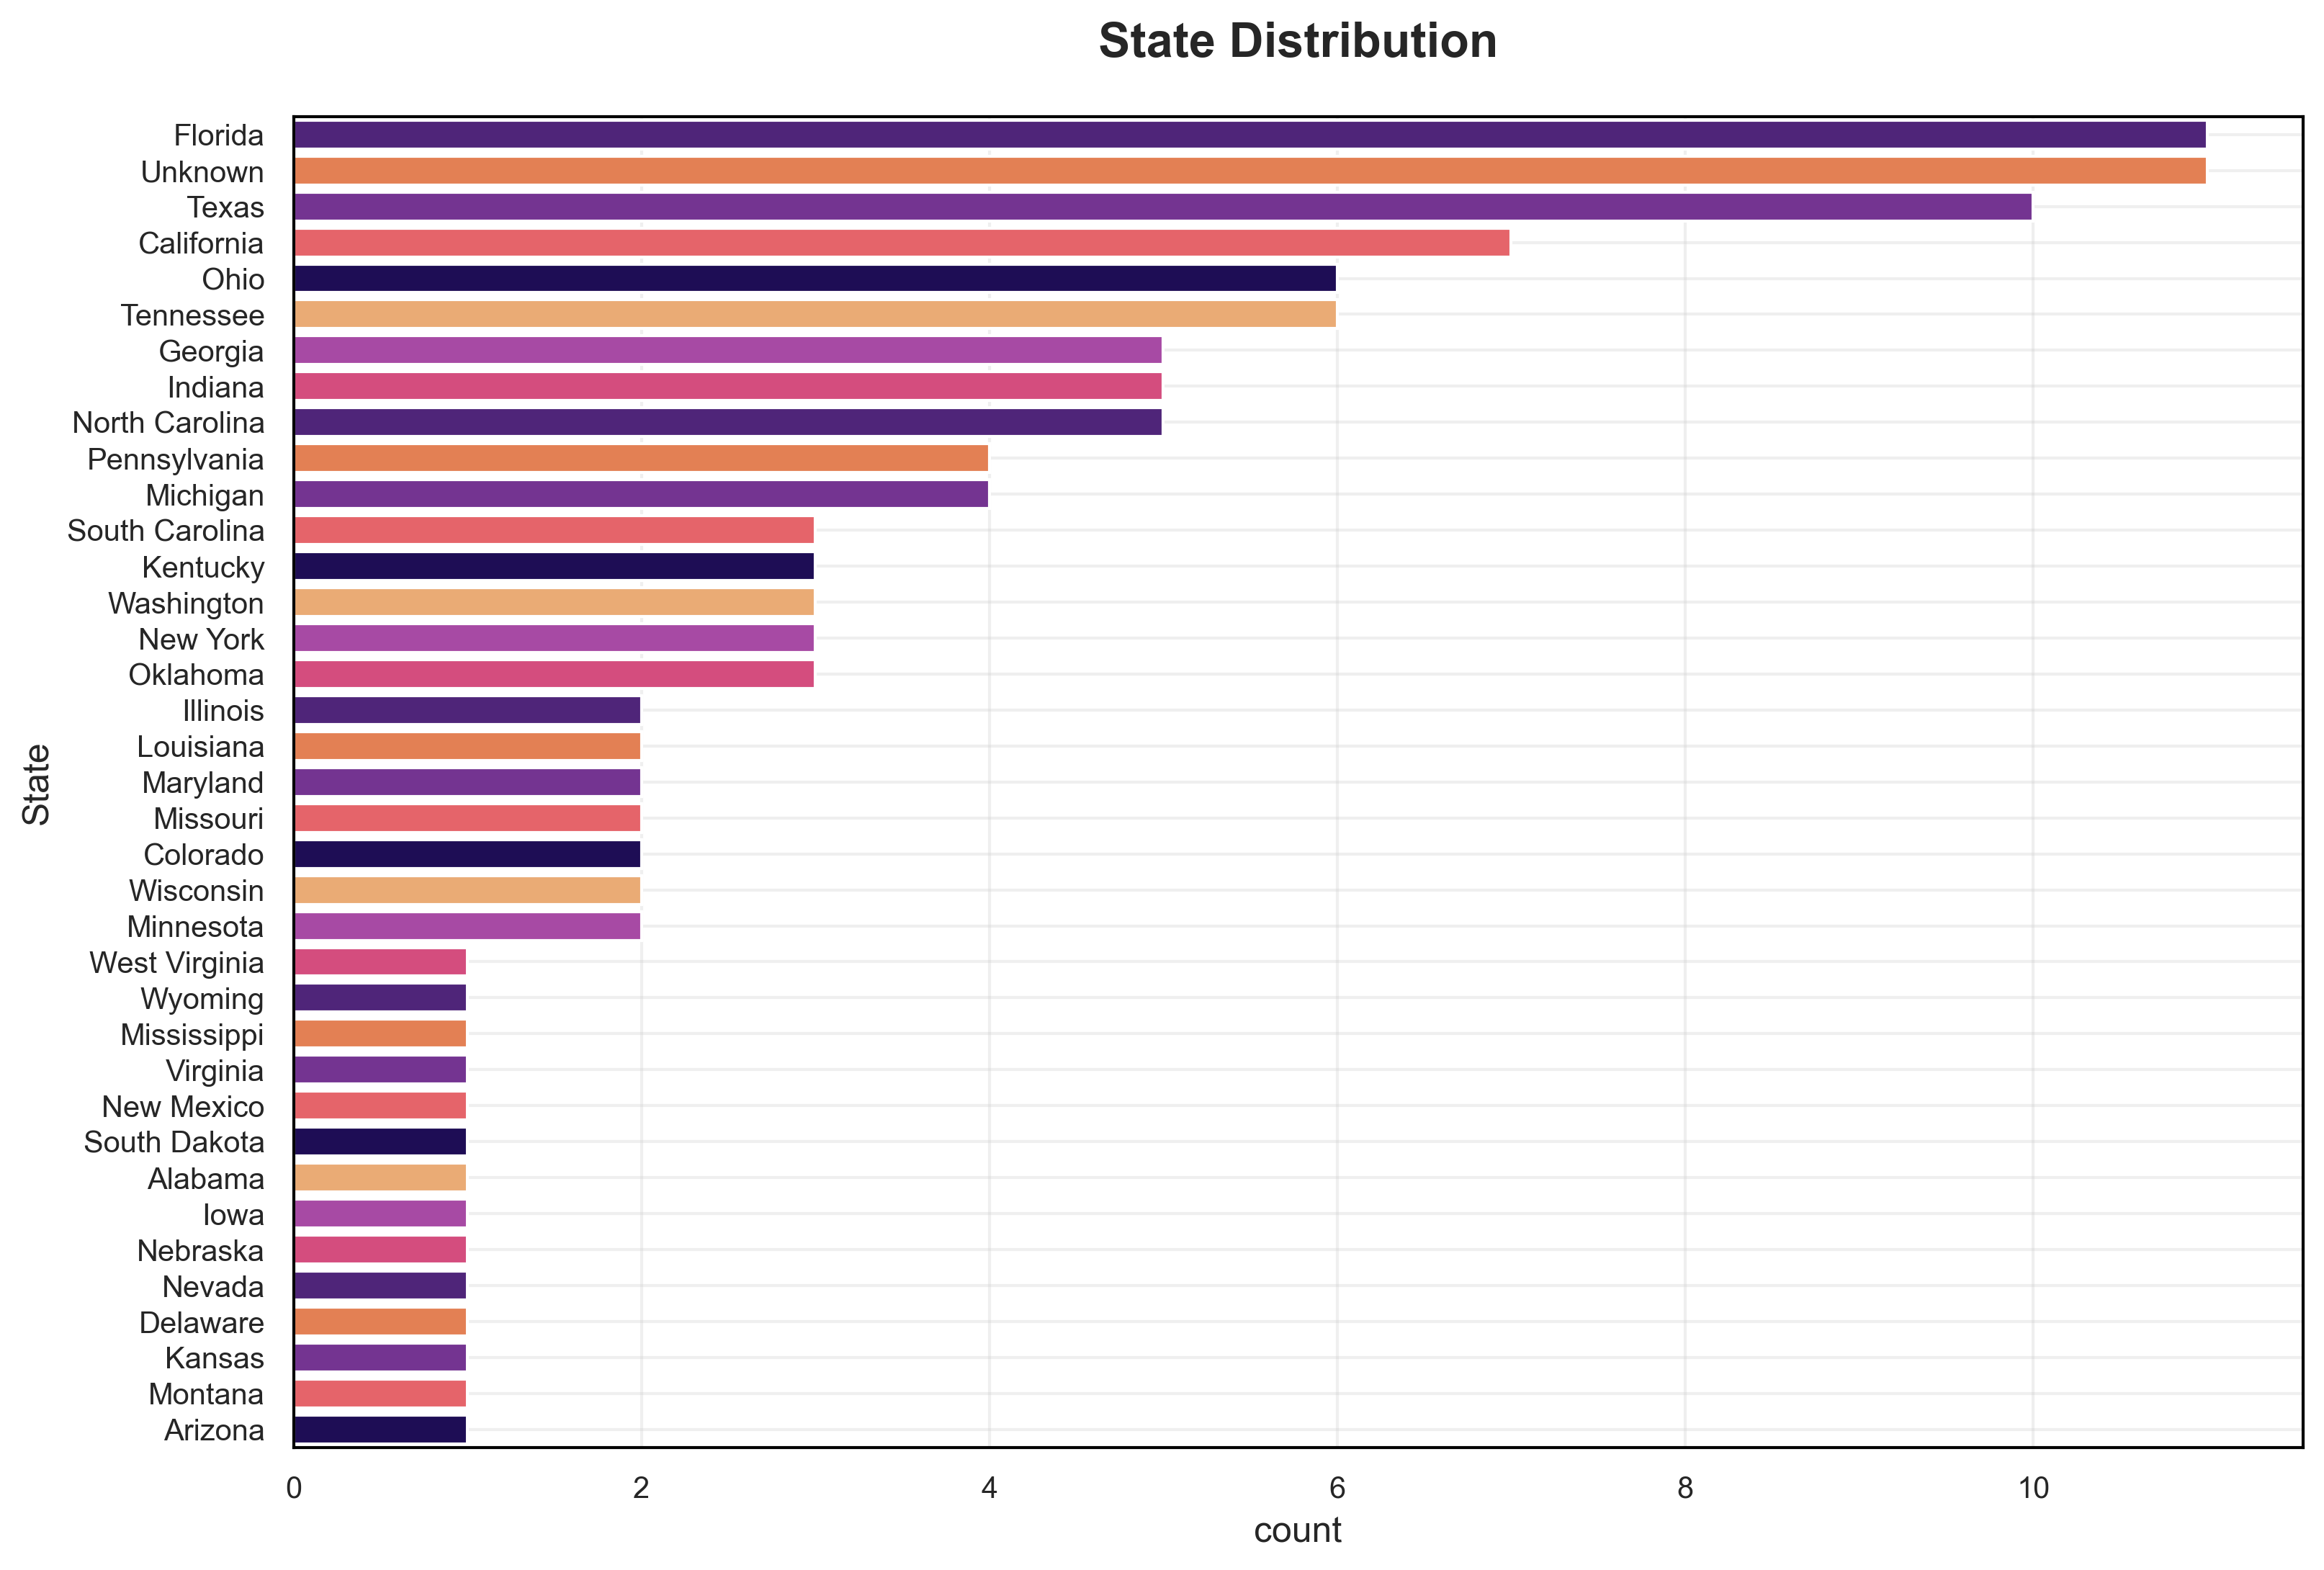

C:\Users\miria\AppData\Local\Temp\ipykernel_3744\2009107801.py:160: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)
C:\Users\miria\AppData\Local\Temp\ipykernel_3744\2009107801.py:160: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)


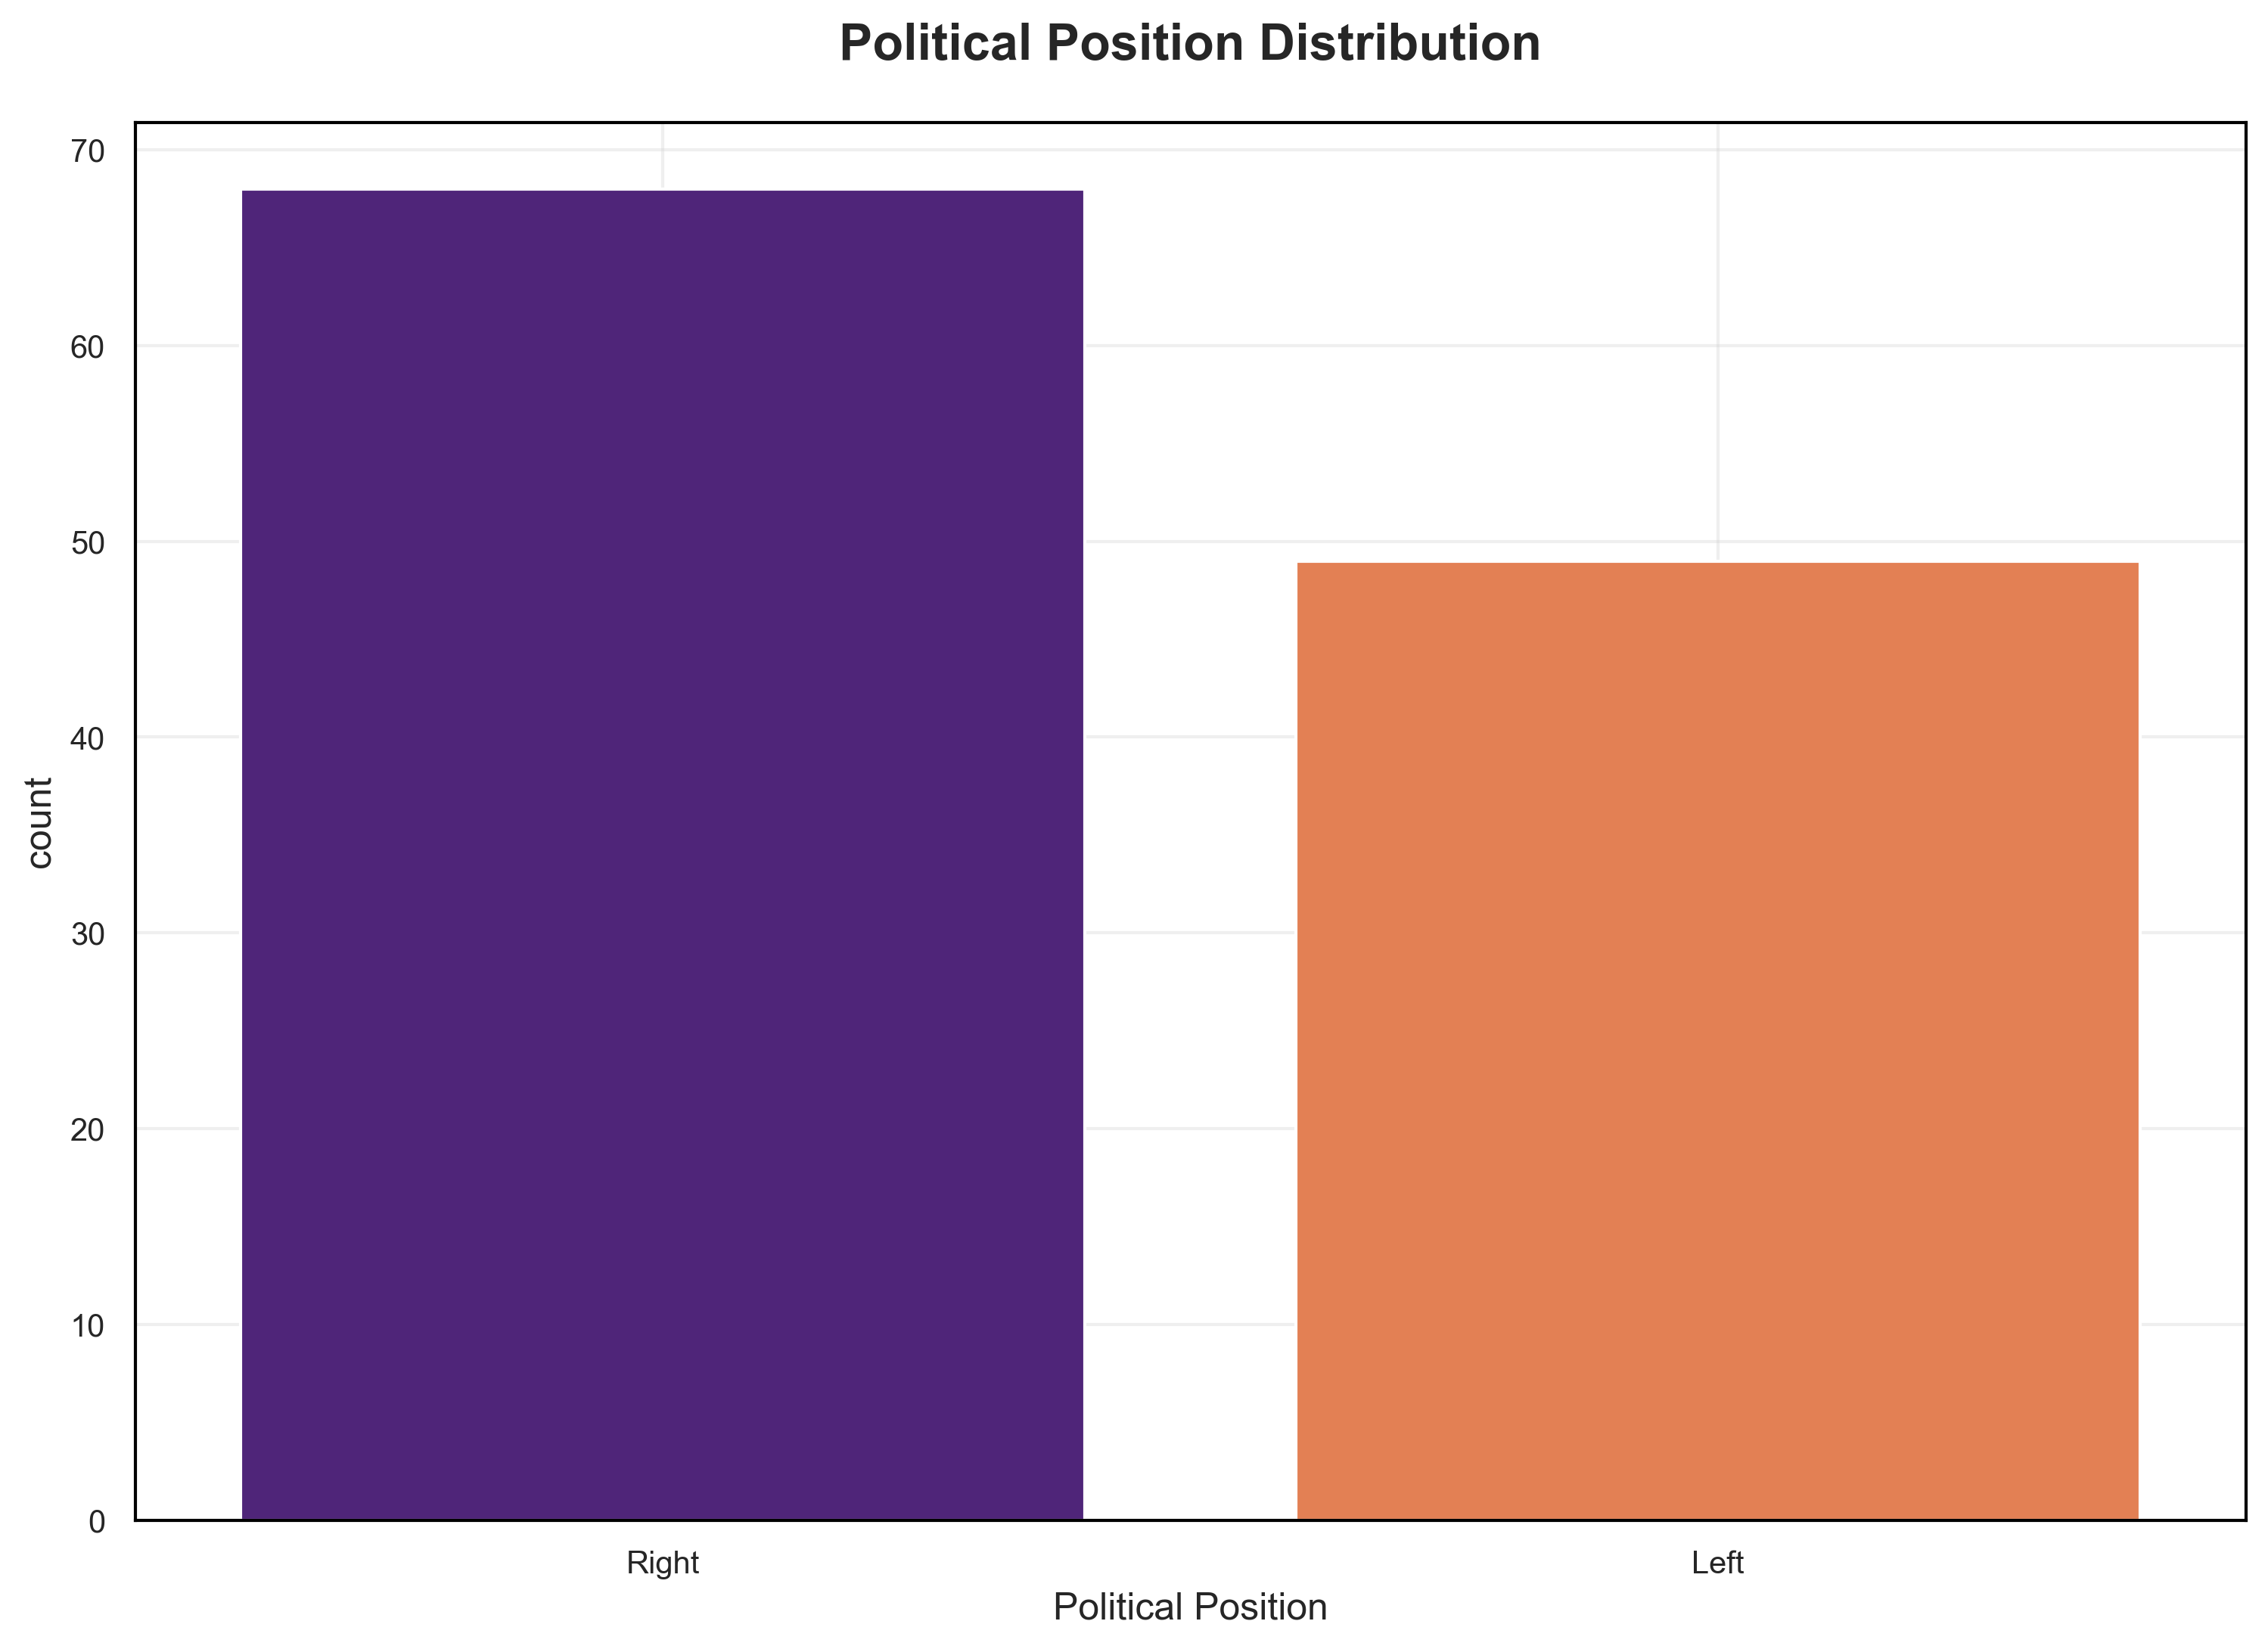

C:\Users\miria\AppData\Local\Temp\ipykernel_3744\2009107801.py:160: UserWarning: 
The palette list has fewer values (8) than needed (9) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)


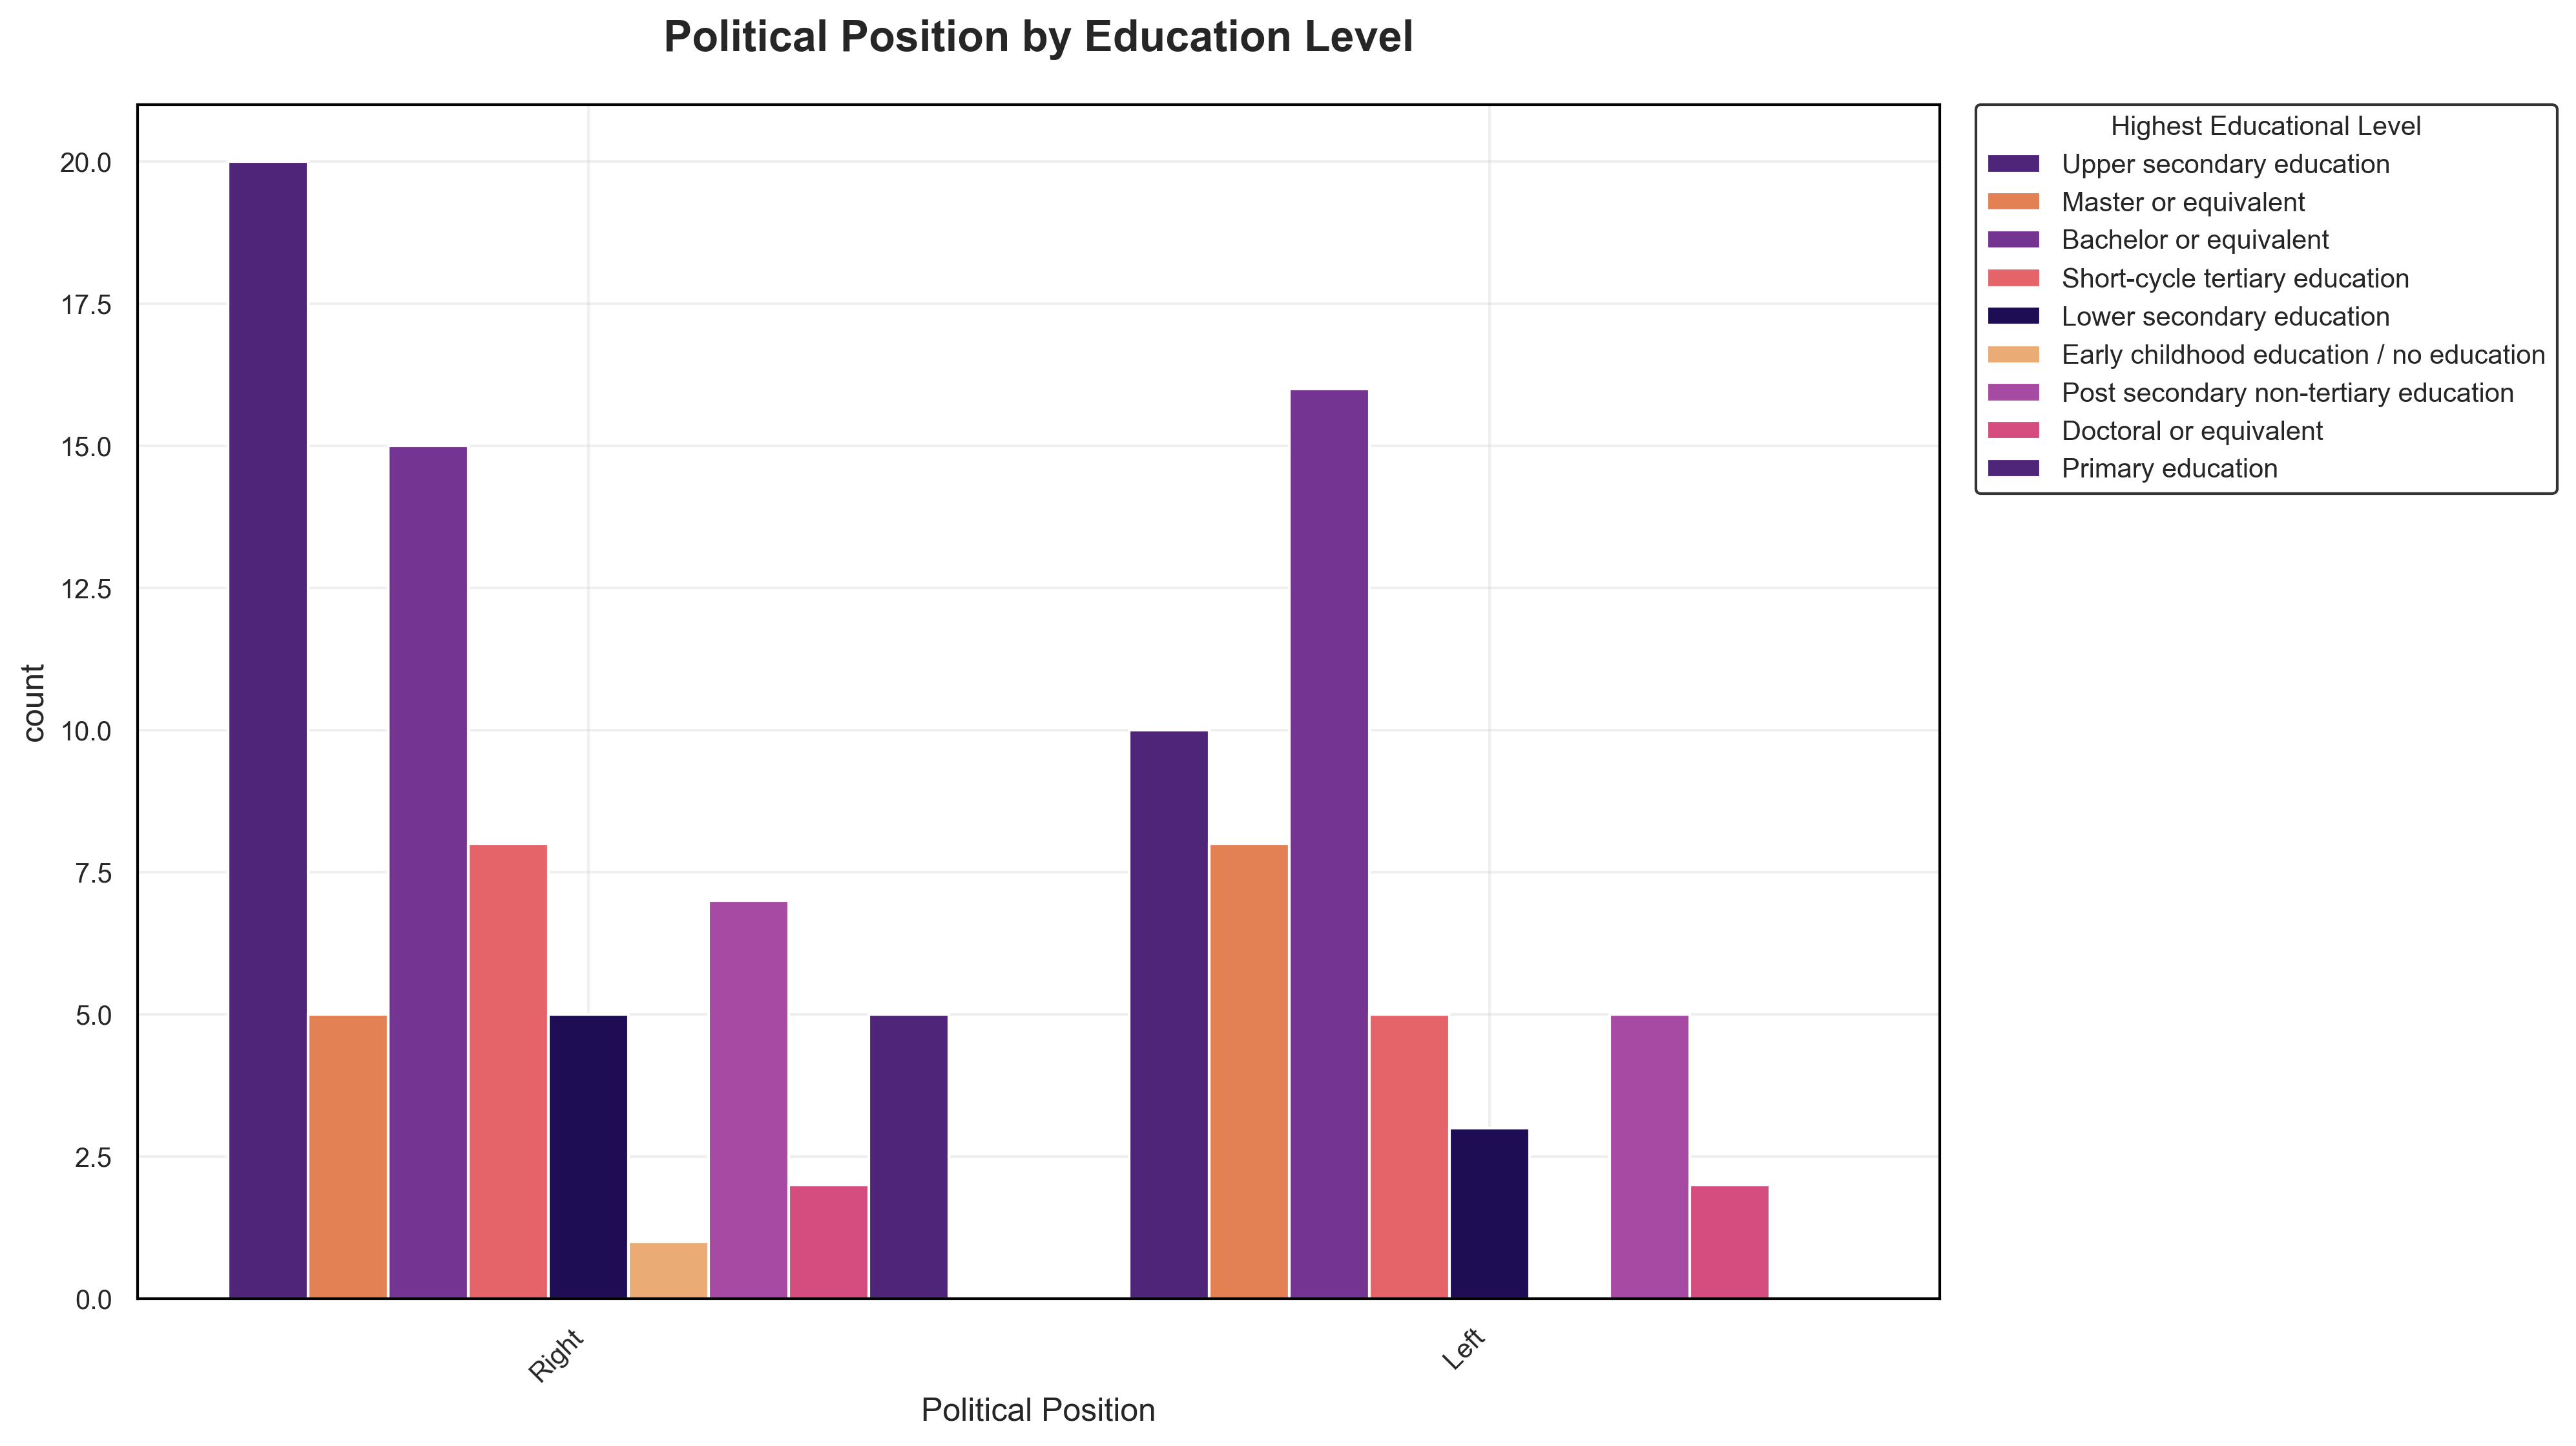

C:\Users\miria\AppData\Local\Temp\ipykernel_3744\2009107801.py:160: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)


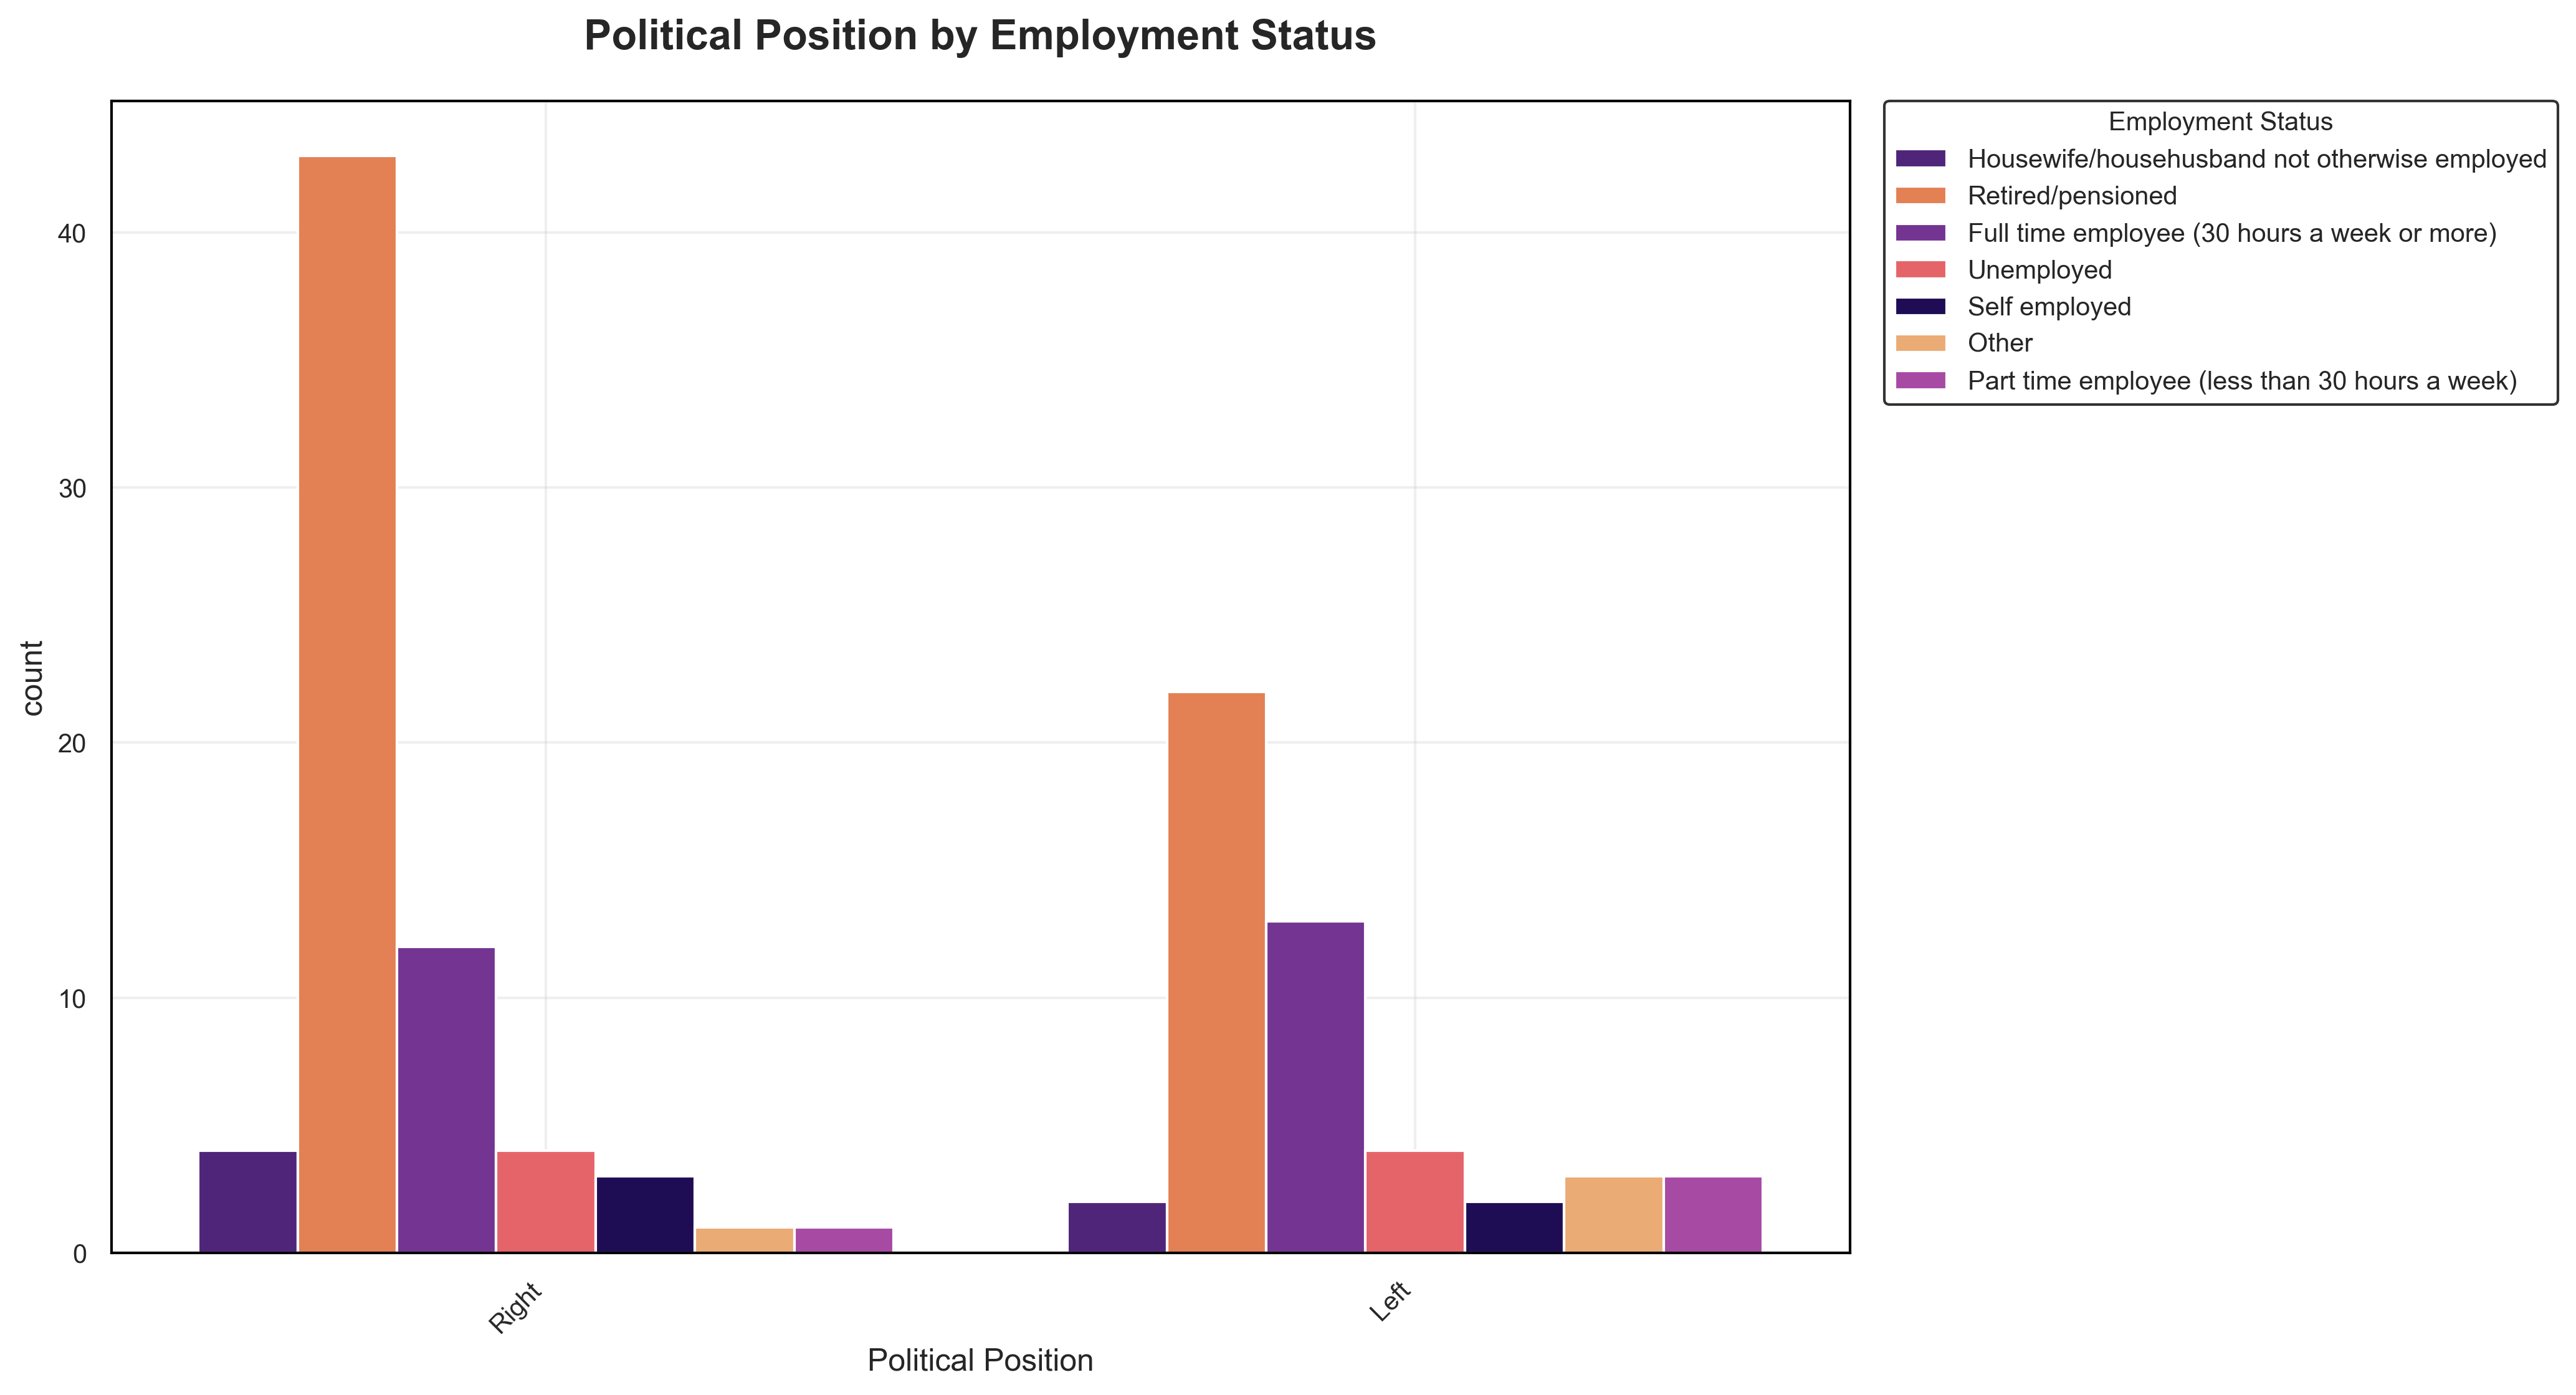

C:\Users\miria\AppData\Local\Temp\ipykernel_3744\2009107801.py:160: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)


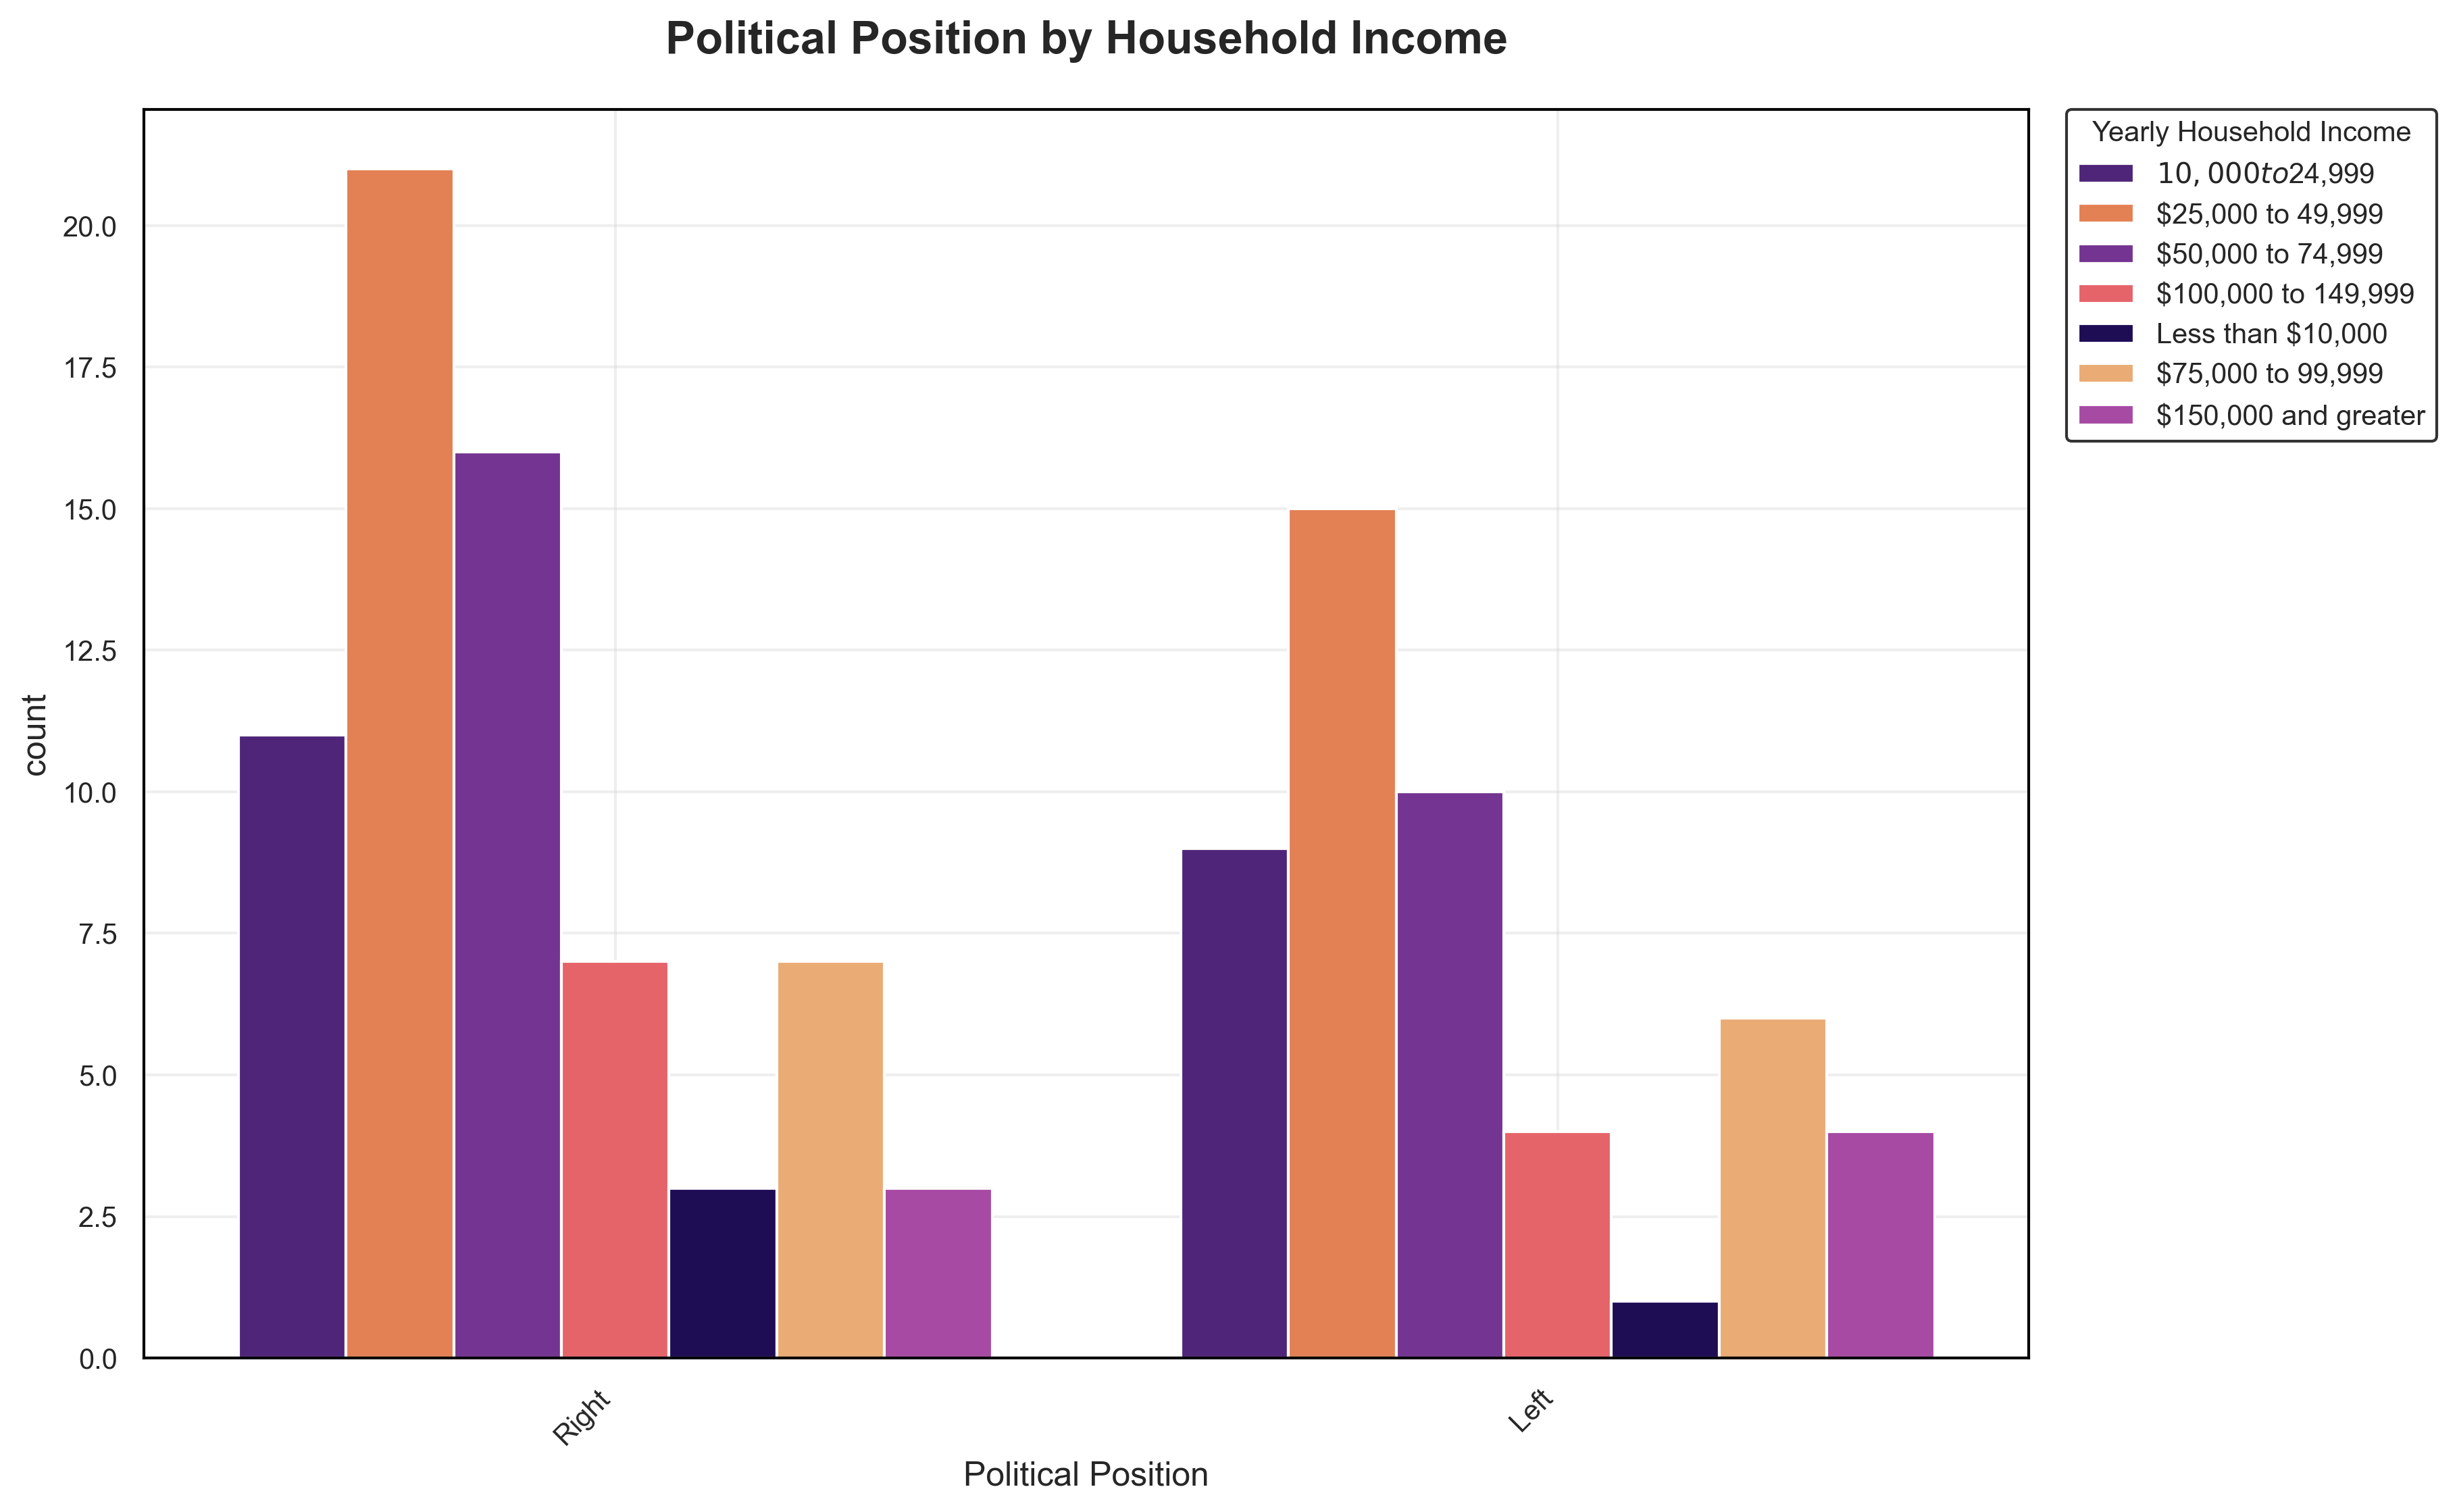

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
import io
import matplotlib.colors as clr

class PublicationStyle:
    """
    A class to maintain consistent styling across scientific publication visualizations.
    """
    
    # Color palettes
    MAIN_COLORS = {
        'primary': '#4F1787',
        'secondary': '#FB773C',
        'tertiary': '#7A24A1',
        'quaternary': '#FB4E56',
        'accent1': '#180161',
        'accent2': '#FDAA62',
        'accent3': '#B73AB3',
        'accent4': '#EB3678'
    }
    
    PALETTE = list(MAIN_COLORS.values())
    
    GRADIENT_COLORS = ['#FDAA62', '#FB773C', '#FB4E56', '#EB3678', 
                      '#B73AB3', '#7A24A1', '#4F1787', '#180161']
    
    GRADIENT_CMAP = clr.LinearSegmentedColormap.from_list('custom', GRADIENT_COLORS)
    
    # Font sizes
    FONT_SIZES = {
        'tiny': 8,
        'small': 10,
        'medium': 12,
        'large': 14,
        'xlarge': 16,
        'title': 16,
        'subtitle': 14,
        'axis_label': 12,
        'tick_label': 10,
        'legend': 10,
        'annotation': 9
    }
    
    @classmethod
    def set_style(cls):
        """Set the default style for all visualizations."""
        # Set basic seaborn style
        sns.set_theme(style="whitegrid", font='Arial')
        
        # Set default parameters
        plt.rcParams.update({
            # Font settings
            'font.size': cls.FONT_SIZES['medium'],
            
            # Figure settings
            'figure.figsize': (8, 6),
            'figure.dpi': 300,
            
            # Axes settings
            'axes.titlesize': cls.FONT_SIZES['title'],
            'axes.labelsize': cls.FONT_SIZES['axis_label'],
            'axes.grid': True,
            'grid.alpha': 0.3,
            
            # Tick settings
            'xtick.labelsize': cls.FONT_SIZES['tick_label'],
            'ytick.labelsize': cls.FONT_SIZES['tick_label'],
            
            # Legend settings
            'legend.fontsize': cls.FONT_SIZES['legend'],
            'legend.title_fontsize': cls.FONT_SIZES['legend'],
            'legend.frameon': True,
            'legend.framealpha': 0.8,
            'legend.edgecolor': 'black',
            
            # Lines and markers
            'lines.linewidth': 2,
            'lines.markersize': 8
        })
    
    @classmethod
    def format_axis(cls, ax, title=None, xlabel=None, ylabel=None, 
                   xticks=None, yticks=None, rotation=0):
        """Format a single axis with consistent styling."""
        if title:
            ax.set_title(title, pad=20, fontweight='bold')
        if xlabel:
            ax.set_xlabel(xlabel)
        if ylabel:
            ax.set_ylabel(ylabel)
        if xticks is not None:
            ax.set_xticks(xticks[0])
            ax.set_xticklabels(xticks[1], rotation=rotation)
        if yticks is not None:
            ax.set_yticks(yticks[0])
            ax.set_yticklabels(yticks[1])
        
        # Add subtle grid
        ax.grid(True, alpha=0.3)
        
        # Style spines
        for spine in ax.spines.values():
            spine.set_linewidth(1)
            spine.set_color('black')
    
    @classmethod
    def add_figure_labels(cls, fig, labels=None):
        """Add subplot labels (a, b, c, etc.) to figure."""
        if labels is None:
            labels = list('abcdefghijklmnopqrstuvwxyz')
        
        for n, ax in enumerate(fig.axes):
            if n < len(labels):
                ax.text(-0.1, 1.1, f'({labels[n]})', transform=ax.transAxes, 
                       size=14, weight='bold')

    @classmethod
    def save_figure(cls, fig, filename, dpi=300, bbox_inches='tight'):
        """Save figure with consistent settings."""
        fig.savefig(filename, dpi=dpi, bbox_inches=bbox_inches)
def main():
    # Apply the publication style
    PublicationStyle.set_style()
    
    # Read and load the data
    data = Path('../data/processed/combined_data.csv').read_text()
    df = pd.read_csv(io.StringIO(data))

    # Extract the state from the location information
    def extract_state(location):
        match = re.search(r',\s*([A-Za-z\s]+)(?=\s*\d{5}|$)', location)
        return match.group(1) if match else "Unknown"

    df['State'] = df['What is your ZIP code?'].apply(extract_state)

    # Simplify political position categories
    df['Political Position'] = df["Where would you place your own political position?"].replace({
        'Extreme Left': 'Left',
        'Far Left': 'Left',
        "Extreme Right": "Right",
    })

    # Use the PublicationStyle's palette for consistency
    palette = PublicationStyle.PALETTE

    # Mapping of long column names to simplified legend titles
    legend_title_mapping = {
        "What is your approximate yearly household net income? Please indicate which category your household is in if you add together the monthly net income of all household members: All wages, salaries, pensions and other incomes after payroll taxes e.g. social security (OASDI), medicare taxes, unemployment taxes.": "Yearly Household Income",
        "What is the highest educational level that you have?": "Highest Educational Level",
        "What is your employment status?": "Employment Status"
    }

    # Visualization helper function with improved legend and x-tick handling
    def visualize_countplot(data, x=None, y=None, hue=None, title=None, xlabel=None, ylabel=None, rotation=0, order=None):
        fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure height to make space for legend
        sns.countplot(data=data, x=x, y=y, hue=hue, palette=palette, order=order, ax=ax)
        
        # Format axis
        PublicationStyle.format_axis(ax, title=title, xlabel=xlabel, ylabel=ylabel, rotation=rotation)
        
        # Adjust legend title based on mapping
        legend_title = legend_title_mapping.get(hue, hue) if hue else None
        if hue:
            ax.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)  # Place legend further outside

        # Rotate x-ticks for better readability if specified
        if rotation:
            plt.xticks(rotation=rotation, ha='right')

        plt.show()
        return fig, ax

    # Visualize gender distribution
    visualize_countplot(data=df, x="What gender are you?", title="Gender Distribution")

    # Visualize state distribution
    visualize_countplot(
        data=df, 
        y="State", 
        title="State Distribution", 
        order=df['State'].value_counts().index
    )

    # Visualize political position distribution
    visualize_countplot(
        data=df, 
        x="Political Position", 
        title="Political Position Distribution"
    )

    # Visualize educational level distribution with rotated x-ticks
    visualize_countplot(
        data=df, 
        x="Political Position",
        hue="What is the highest educational level that you have?",
        title="Political Position by Education Level",
        rotation=45
    )

    # Visualize employment status distribution with rotated x-ticks
    visualize_countplot(
        data=df, 
        x="Political Position",
        hue="What is your employment status?",
        title="Political Position by Employment Status",
        rotation=45
    )

    # Visualize household income distribution with y-axis legend
    visualize_countplot(
        data=df, 
        x="Political Position",
        hue="What is your approximate yearly household net income? Please indicate which category your household is in if you add together the monthly net income of all household members: All wages, salaries, pensions and other incomes after payroll taxes e.g. social security (OASDI), medicare taxes, unemployment taxes.",
        title="Political Position by Household Income",
        rotation=45
    )

if __name__ == '__main__':
    main()


In [6]:
data = Path('../data/processed/combined_data.csv').read_text()
df = pd.read_csv(io.StringIO(data))

In [8]:
df['Political Position'] = df["Where would you place your own political position?"].replace({
    'Extreme Left': 'Left',
    'Far Left': 'Left'
})


In [9]:
df["Political Position"].value_counts()

Political Position
Extreme Right    68
Left             49
Name: count, dtype: int64